/var/folders/br/8qqm121s5xd1vfjbgvyx2hfm0000gn/T/ipykernel_62742/3462582852.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  spotify_df['month'] = spotify_df['timestamp'].dt.to_period('M')


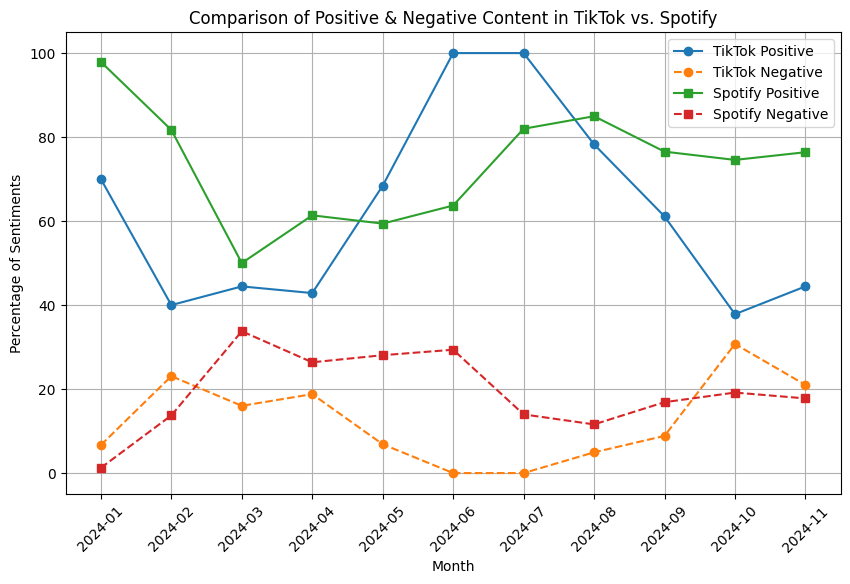

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
tiktok_df = pd.read_csv("tiktok_sentiment.csv")  
spotify_df = pd.read_csv("spotify_sentiment.csv")  

# Convert date column to datetime format
tiktok_df['date'] = pd.to_datetime(tiktok_df['date'])
spotify_df['timestamp'] = pd.to_datetime(spotify_df['timestamp'])

# Extract month and year
tiktok_df['month'] = tiktok_df['date'].dt.to_period('M')
spotify_df['month'] = spotify_df['timestamp'].dt.to_period('M')

# Group by month and count sentiment occurrences
tiktok_sentiment = tiktok_df.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)
spotify_sentiment = spotify_df.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)

# Calculate percentage of positive and negative content for each month
tiktok_sentiment['positive_percentage'] = (tiktok_sentiment['positive'] / tiktok_sentiment.sum(axis=1)) * 100
tiktok_sentiment['negative_percentage'] = (tiktok_sentiment['negative'] / tiktok_sentiment.sum(axis=1)) * 100

spotify_sentiment['positive_percentage'] = (spotify_sentiment['positive'] / spotify_sentiment.sum(axis=1)) * 100
spotify_sentiment['negative_percentage'] = (spotify_sentiment['negative'] / spotify_sentiment.sum(axis=1)) * 100

# Plot the comparison
plt.figure(figsize=(10,6))

plt.plot(tiktok_sentiment.index.astype(str), tiktok_sentiment['positive_percentage'], marker='o', linestyle='-', label='TikTok Positive')
plt.plot(tiktok_sentiment.index.astype(str), tiktok_sentiment['negative_percentage'], marker='o', linestyle='--', label='TikTok Negative')

plt.plot(spotify_sentiment.index.astype(str), spotify_sentiment['positive_percentage'], marker='s', linestyle='-', label='Spotify Positive')
plt.plot(spotify_sentiment.index.astype(str), spotify_sentiment['negative_percentage'], marker='s', linestyle='--', label='Spotify Negative')

# Formatting the graph
plt.xlabel("Month")
plt.ylabel("Percentage of Sentiments")
plt.title("Comparison of Positive & Negative Content in TikTok vs. Spotify")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/br/8qqm121s5xd1vfjbgvyx2hfm0000gn/T/ipykernel_62742/3116190134.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  spotify_df['month'] = spotify_df['timestamp'].dt.to_period('M')


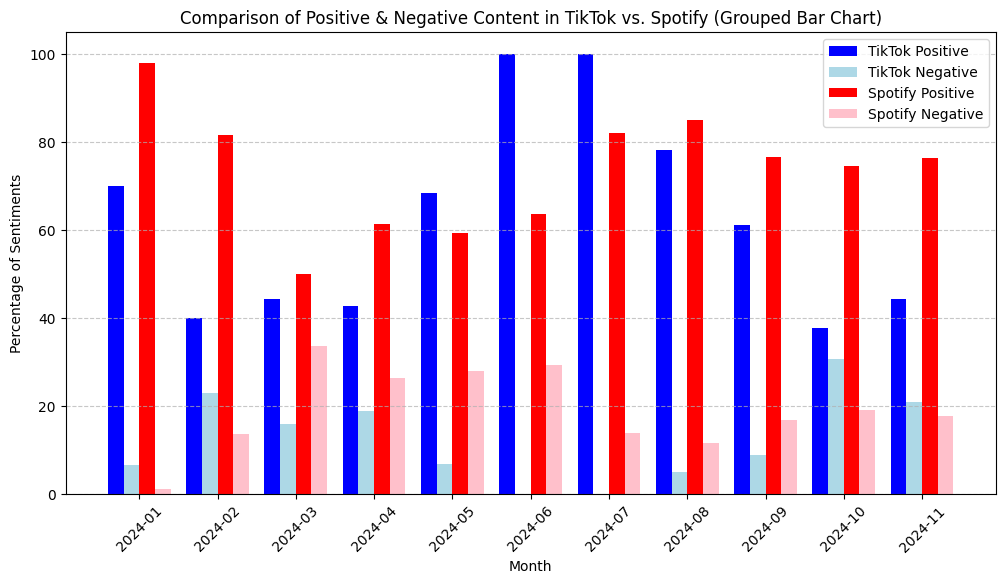

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load both datasets
tiktok_df = pd.read_csv("tiktok_sentiment.csv") 
spotify_df = pd.read_csv("spotify_sentiment.csv") 

# Convert date column to datetime format
tiktok_df['date'] = pd.to_datetime(tiktok_df['date'])
spotify_df['timestamp'] = pd.to_datetime(spotify_df['timestamp'])

# Extract month and year
tiktok_df['month'] = tiktok_df['date'].dt.to_period('M')
spotify_df['month'] = spotify_df['timestamp'].dt.to_period('M')

# Group by month and count sentiment occurrences
tiktok_sentiment = tiktok_df.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)
spotify_sentiment = spotify_df.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)

# Calculate percentage of positive and negative content for each month
tiktok_sentiment['positive_percentage'] = (tiktok_sentiment['positive'] / tiktok_sentiment.sum(axis=1)) * 100
tiktok_sentiment['negative_percentage'] = (tiktok_sentiment['negative'] / tiktok_sentiment.sum(axis=1)) * 100

spotify_sentiment['positive_percentage'] = (spotify_sentiment['positive'] / spotify_sentiment.sum(axis=1)) * 100
spotify_sentiment['negative_percentage'] = (spotify_sentiment['negative'] / spotify_sentiment.sum(axis=1)) * 100

# Set up bar chart positions
months = tiktok_sentiment.index.astype(str)  # Convert month index to string
x = np.arange(len(months))  # X positions for bars
width = 0.2  # Width of bars

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# TikTok bars
ax.bar(x - width*1.5, tiktok_sentiment['positive_percentage'], width, label='TikTok Positive', color='blue')
ax.bar(x - width*0.5, tiktok_sentiment['negative_percentage'], width, label='TikTok Negative', color='lightblue')

# Spotify bars
ax.bar(x + width*0.5, spotify_sentiment['positive_percentage'], width, label='Spotify Positive', color='red')
ax.bar(x + width*1.5, spotify_sentiment['negative_percentage'], width, label='Spotify Negative', color='pink')

# Formatting the graph
ax.set_xlabel("Month")
ax.set_ylabel("Percentage of Sentiments")
ax.set_title("Comparison of Positive & Negative Content in TikTok vs. Spotify (Grouped Bar Chart)")
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
